In [10]:
import pandas as pd 
import numpy as np
import math
import IPython
import IPython.display
import matplotlib.pyplot as plt
from kneed import KneeLocator
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime


In [3]:
# Import data



df = pd.read_json('../data/raw/block_stats_dump.json')

df.head()

,avgfee,avgfeerate,avgtxsize,blockhash,feerate_percentiles,height,ins,maxfee,maxfeerate,maxtxsize,...,swtotal_weight,swtxs,time,total_out,total_size,total_weight,totalfee,txs,utxo_increase,utxo_size_inc
0,2156,5,682,0000000000000000000a1f8c514e14383378027df9d09e...,"[1, 2, 2, 4, 9]",727609,7981,338130,346,167455,...,3281715,2101,1647445268,3410696965340,1647991,3991711,5204878,2415,-1423,-100026
1,1525,4,549,00000000000000000005b8a11714c19cb7b49eb3441615...,"[2, 3, 3, 4, 5]",727608,7505,193996,272,106374,...,3204862,2557,1647444991,426035824529,1636754,3996614,4541963,2979,-483,-33362
2,6628,9,1424,000000000000000000017c0dc447fcc38e0ff3ec0889dd...,"[4, 4, 7, 7, 9]",727607,7016,597983,349,92187,...,3642260,1151,1647444782,415981617544,1995027,3991944,9286897,1402,-2636,-191522
3,3873,8,793,00000000000000000005d49059ecd13c5f5cc57d4437c7...,"[4, 4, 5, 7, 10]",727606,6814,439640,269,83200,...,2994703,1666,1647444350,6435414051194,1634416,3991831,7983917,2062,888,66269
4,2940,6,853,00000000000000000008fc64393f85e314429f6b17d0c9...,"[4, 4, 5, 6, 7]",727605,6588,278748,371,92191,...,3598538,1795,1647443814,680578635895,1774510,3991678,6110328,2079,753,57523


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avgfee,1000.0,4.209449e+03,8.084759e+03,0.000000e+00,2.778500e+03,3.480500e+03,4.504250e+03,2.491460e+05
avgfeerate,1000.0,8.173000e+00,4.224087e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,4.100000e+01
avgtxsize,1000.0,8.048290e+02,7.750638e+02,0.000000e+00,5.280000e+02,6.290000e+02,8.180000e+02,1.223500e+04
height,1000.0,7.271095e+05,2.888194e+02,7.266100e+05,7.268598e+05,7.271095e+05,7.273592e+05,7.276090e+05
ins,1000.0,5.266624e+03,2.476649e+03,0.000000e+00,3.205750e+03,6.332000e+03,6.980500e+03,1.123300e+04
maxfee,1000.0,4.603770e+05,7.966370e+05,0.000000e+00,1.903460e+05,3.019790e+05,4.755158e+05,1.000000e+07
maxfeerate,1000.0,3.969020e+02,3.790214e+02,0.000000e+00,2.495000e+02,3.130000e+02,4.537500e+02,5.945000e+03
maxtxsize,1000.0,8.785648e+04,4.959967e+04,0.000000e+00,5.279275e+04,8.444850e+04,1.038502e+05,2.650370e+05
medianfee,1000.0,1.078698e+03,5.562213e+02,0.000000e+00,7.942500e+02,1.000000e+03,1.278000e+03,1.001000e+04
mediantime,1000.0,1.647150e+09,1.681193e+05,1.646859e+09,1.647005e+09,1.647148e+09,1.647294e+09,1.647444e+09


In [8]:
## Drop some meta fields
df.drop('blockhash', inplace=True)

KeyError: "['blockhash'] not found in axis"

In [13]:
## Apply date transform 
def as_date(ts):
  return(datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

df.time = pd.to_datetime(df.time.apply(as_date))

<AxesSubplot:xlabel='time'>

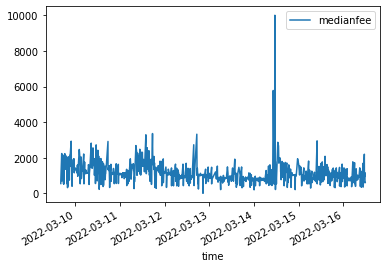

In [14]:
df.plot(x = 'time', y = 'medianfee', kind = 'line')